In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import re


# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

### Load Data and check the shape of data

In [5]:
train = pd.read_csv("nlp-getting-started/train.csv")
test = pd.read_csv("nlp-getting-started/test.csv")
print(train.shape)
print(test.shape)
train.head(3)

(7613, 5)
(3263, 4)


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1


### Let's check number of positive and negative samples that we have in the data

0    4342
1    3271
Name: target, dtype: int64


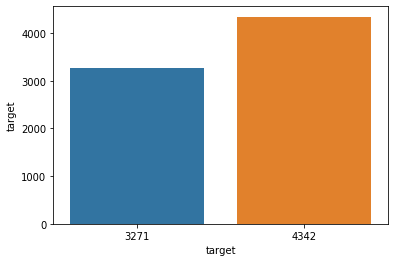

In [6]:
print(train.target.value_counts())
x = train.target.value_counts()
sns.barplot(x = x.index, y = x, data= x)

### Let's try to find %tage of missing keywords from both test and train data

In [7]:
train_kmiss = train.keyword.isna().sum()
train_lmiss = train.location.isna().sum()
print("Number of samples with missing Keyword in train data is {}".format(train_kmiss))
print("Number of samples with missing location in train data is {}".format(train_lmiss))
test_kmiss = test.keyword.isna().sum()
test_lmiss = test.location.isna().sum()
print("Number of samples with missing Keyword in test data is {}".format(test_kmiss))
print("Number of samples with missing location in test data is {}".format(test_lmiss))

print("%tage of missing keywords in train data is {:.2f}".format((train_kmiss/train.size) * 100))
print("%tage of missing keywords in test data is {:.2f}".format((test_kmiss/test.size) * 100))
print("%tage of missing locations in train data is {:.2f}".format((train_lmiss/train.size) * 100))
print("%tage of missing locations in test data is {:.2f}".format((test_lmiss/test.size) * 100))


Number of samples with missing Keyword in train data is 61
Number of samples with missing location in train data is 2533
Number of samples with missing Keyword in test data is 26
Number of samples with missing location in test data is 1105
%tage of missing keywords in train data is 0.16
%tage of missing keywords in test data is 0.20
%tage of missing locations in train data is 6.65
%tage of missing locations in test data is 8.47


We can see that %tage of missing locations and keywords in training and testing data are almost identical in train and test set.

### Let's try to find the number of unique in keyword and location.

In [8]:
print("Number of unique values in train data for keyword is {}".format(train.keyword.nunique()))
print("Number of unique values in train data for location is {}".format(train.location.nunique()))
print("Number of unique values in test data for keyword is {}".format(test.keyword.nunique()))
print("Number of unique values in test data for location is {}".format(test.location.nunique()))

Number of unique values in train data for keyword is 221
Number of unique values in train data for location is 3341
Number of unique values in test data for keyword is 221
Number of unique values in test data for location is 1602


As we can see that number of unique values for keyword is less than that of location, it would be wiser to perform analysis on keywords rathar than locations. Also, people can be tweeting from various locations and natural disasters have no pattern of occuring more in one region and less in another.

### Let's plot a graph of unique words to understand this better.

In [9]:
count_df = train.keyword.value_counts().rename_axis('unique_values').reset_index(name='counts')
print(count_df)

             unique_values  counts
0               fatalities      45
1                   deluge      42
2               armageddon      42
3                  sinking      41
4                     harm      41
..                     ...     ...
216          forest%20fire      19
217              epicentre      12
218                 threat      11
219             inundation      10
220  radiation%20emergency       9

[221 rows x 2 columns]


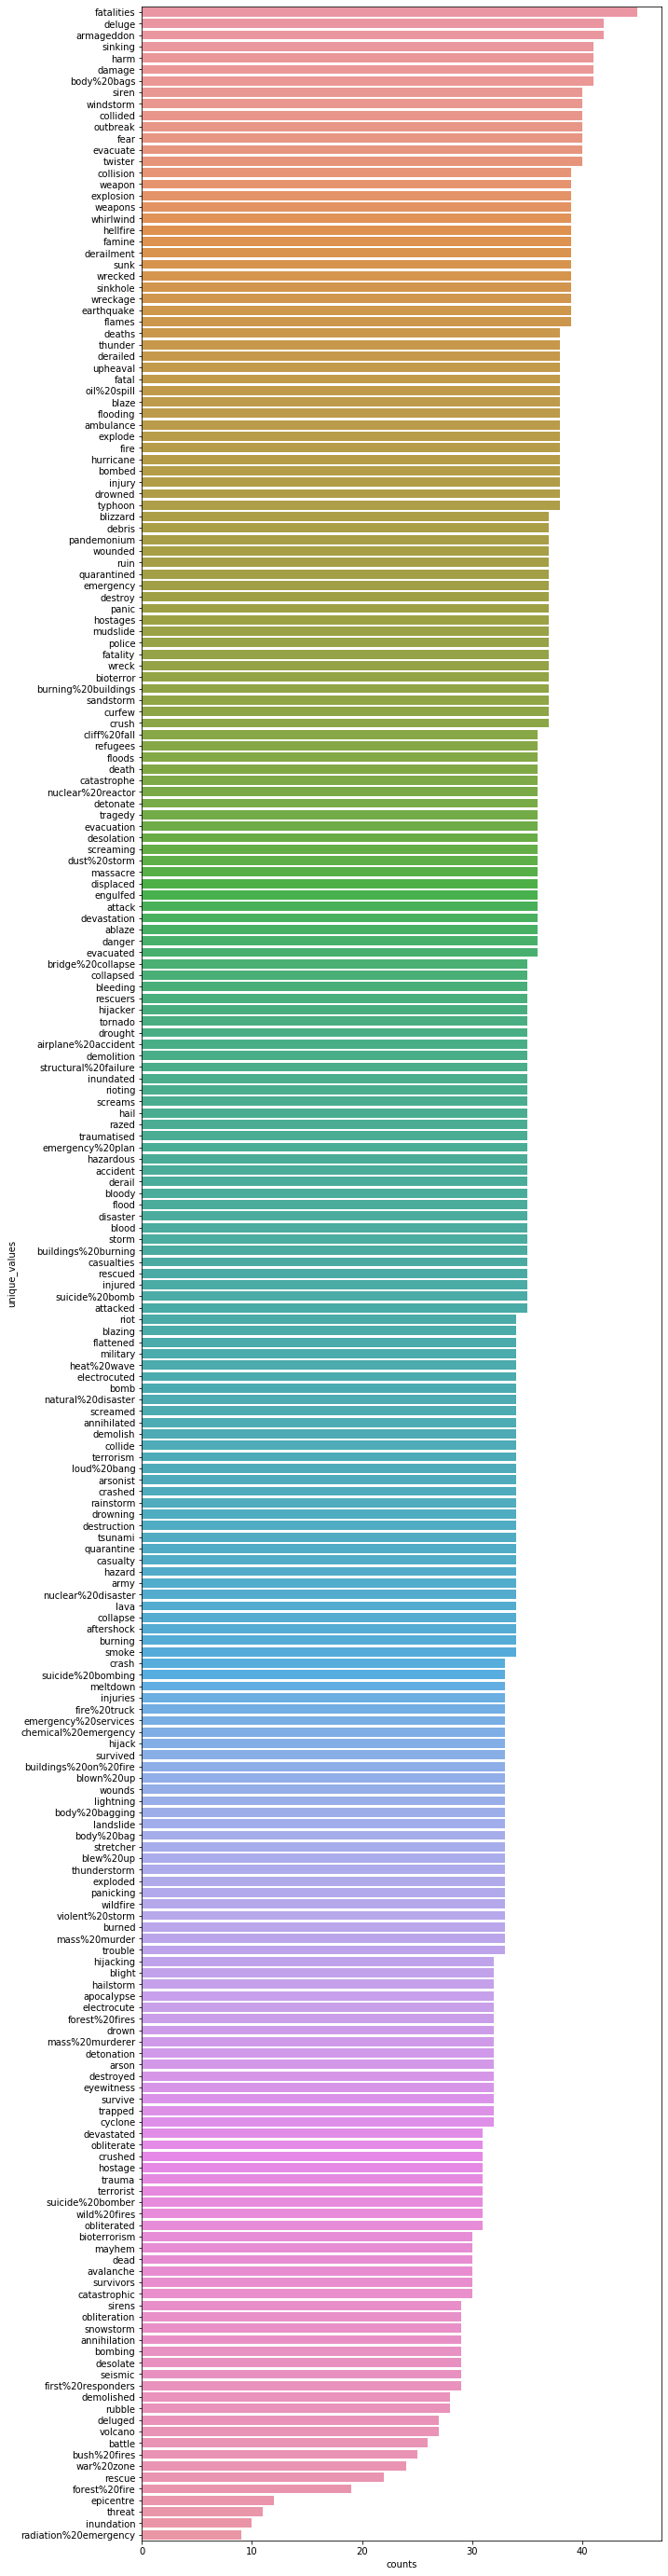

In [10]:
plt.figure(figsize=(10,50))
ax = sns.barplot(x = "counts", y = "unique_values", data = count_df, orient='h')


### Let's find distribution of number of characters in a disaster tweet vs number of characters in a non disaster tweet

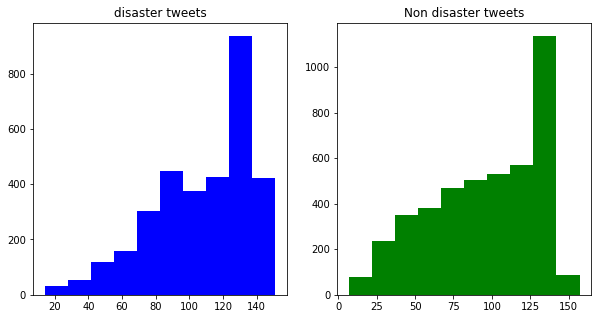

In [11]:
figure, (p1, p2) = plt.subplots(1, 2, figsize = (10, 5))
tweet_length = train[train["target"] == 1]["text"].str.len()
p1.hist(tweet_length, color='blue')
p1.set_title("disaster tweets")
tweet_length = train[train["target"] == 0]["text"].str.len()
p2.hist(tweet_length, color='green')
p2.set_title("Non disaster tweets")
plt.show()

# Data Cleaning

## For the data cleaning we will remove all the URL's, html tags, hashtags, emojis and correct the spelling mistakes

In [12]:
def remove_urls(doc):
    return re.sub(r"http\S+", "", doc)

In [13]:
new_df = train

In [14]:
example = "goto  :https://www.google.com"
print(remove_urls(example))

goto  :


In [15]:
new_df["text"] = new_df["text"].apply(lambda x: remove_urls(x))
new_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


#### Now, let's remove html tags from the data

In [16]:
def remove_html(doc):
    return re.sub(r'<.*?>', '', doc)

In [17]:
example = "<html> <head> \
<body> Hello there </body></head></html>"
print(remove_html(example))

   Hello there 


In [18]:
new_df["text"] = new_df["text"].apply(lambda x: remove_urls(x))

In [19]:
new_df.to_csv("cleaned_data.csv")

## Before, removing hashtags let's check if hashtags help us distinguish between disaster and non disaster tweets

In [20]:
def count_hashtags(doc):
    hashtags = 0
    for line in doc:
        for chars in line:
            if chars == '#':
                hashtags += 1
    return hashtags

In [21]:
example = "here's is an example #kaggle #twitter"
count_hashtags(example)

2

In [22]:
ntweets_disaster = new_df[new_df["target"] == 1].text.apply(lambda x: count_hashtags(x))
ntweets_false = new_df[new_df["target"] == 0].text.apply(lambda x: count_hashtags(x))
print(ntweets_disaster.value_counts())
print(ntweets_false.value_counts())


0     2396
1      482
2      203
3      100
4       38
5       23
10       7
8        7
6        7
13       4
7        4
Name: text, dtype: int64
0     3456
1      482
2      202
3      108
4       45
6       19
5       18
7        4
10       3
11       2
9        2
8        1
Name: text, dtype: int64


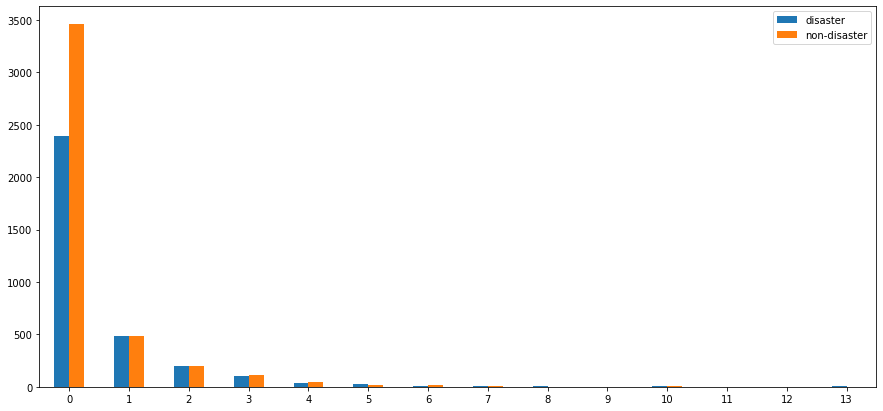

In [23]:
indices = [0, 1, 2, 3, 4, 5, 6,7,8,9,10,11,12,13]
df = pd.DataFrame({'disaster':ntweets_disaster.value_counts(), 'non-disaster':ntweets_false.value_counts()}, index = indices)
df.plot.bar(rot = 0, figsize = (15,7))

### Since the number of hashtags in both disaster and false disaster are similar, it would be wise to remove hastags from the data. Also there is variation in number of hastags only if there are no hashtags, so it won't make a huge difference

In [24]:
def remove_hashtags(doc):
    return re.sub(r"#.*?", '', doc)

In [25]:
example = "this is ###tag #tag"
print(remove_hashtags(example))

this is tag tag


In [26]:
new_df["text"] = new_df["text"].apply(lambda x: remove_hashtags(x))

In [27]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

remove_emoji("Omg another Earthquake 😔😔")

'Omg another Earthquake '

In [28]:
new_df['text']=new_df['text'].apply(lambda x: remove_emoji(x))

In [29]:
!pip install pyspellchecker

In [30]:
# source https://www.kaggle.com/shahules/basic-eda-cleaning-and-glove
from spellchecker import SpellChecker
spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
        
text = "corect me plese"
correct_spellings(text)

'correct me please'

In [ ]:
new_df['text']=new_df['text'].apply(lambda x: correct_spellings(x))

# Meta Features and their impacts

1) Average number of words per sentence <br \>
2) Number of characters <br \>
3) Number of special characters <br \>
4) Number of punctuations <br \>
5) Number of positive negative words <br \>
6) Type token ratio <br \>
7) Number of stop words <br \>
8) Number of function words

In [ ]:
import nlp
nlp = en_core_web_lg.load()